In [1]:
#Imporations libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats

In [2]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,4)})

In [3]:
# Affichage des nombres : séparateur des milliers, et réduction du nombre de décimales
pd.options.display.float_format = '{:,.2f}'.format

# Exploration
On dispose de 3 jeux de données : clients, produits et transactions.

In [22]:
# Les donnes sont stocker dans un repertoir source Githube Repository
url = 'https://raw.githubusercontent.com/bbouya/Data_Analyst/main/analyse_vente/sources/'
# Dataset clients
clients = pd.read_csv(url + 'customers.csv')
# Dataset produits
produits = pd.read_csv(url + 'products.csv')
# Transactions dataset
transactions = pd.read_csv(url + 'transactions.csv')


In [23]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


On verifier que la table ne contient aucun doublon avant de pouvoir determiner la cle primaire,
a savoir 'client_id: les 8622 clients sont tous distincts

In [24]:
#savoir nembre de doublons dn la dataframe

def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons')

doublons(clients)

0 doublons


In [25]:
def cle_primaire(df_cle): # Vérification de la clé primaire
    table_length = len(df_cle) - len(df_cle.drop_duplicates())
    if table_length == 0:
        print('Clé primaire (0 doublon)')
    else:
        print('Pas une clé primaire (', table_length, 'doublons )')
    

print(cle_primaire(clients['birth']))
print(cle_primaire(clients['client_id']))

Pas une clé primaire ( 8547 doublons )
None
Clé primaire (0 doublon)
None


In [26]:
clients['client_id']

0       c_4410
1       c_7839
2       c_1699
3       c_5961
4       c_5320
         ...  
8618    c_7920
8619    c_7403
8620    c_5119
8621    c_5643
8622      c_84
Name: client_id, Length: 8623, dtype: object

In [27]:
cle_primaire(clients['client_id'])

Clé primaire (0 doublon)


In [28]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [29]:
clients.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,"8,623.00"
unique,8623,2,NaN
top,c_7739,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,"1,978.28"
std,NaN,NaN,16.92
min,NaN,NaN,"1,929.00"
25%,NaN,NaN,"1,966.00"
50%,NaN,NaN,"1,979.00"
75%,NaN,NaN,"1,992.00"


In [30]:
#le variable 'sex' n'affiche elle que deux modalites:
print('Modalite de sex', list(clients['sex'].unique()))

Modalite de sex ['f', 'm']


# Produits
la table produit detaille l'identifiant, le prix et la categorie de 3287 livres


In [31]:
produits.head()


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [32]:
# la encore aucun doublon ni valuer manquante.
doublons(produits)

0 doublons


In [33]:
cle_primaire(produits["id_prod"])

Clé primaire (0 doublon)


In [34]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [35]:
produits.describe(include = "all")

,id_prod,price,categ
count,3287,"3,287.00","3,287.00"
unique,3287,NaN,NaN
top,0_326,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.86,0.37
std,NaN,29.85,0.62
min,NaN,-1.00,0.00
25%,NaN,6.99,0.00
50%,NaN,13.06,0.00
75%,NaN,22.99,1.00


In [36]:
produits.sort_values(by='price')

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [37]:
print("Modalite de categ : ", list(produits['categ'].unique()))

Modalite de categ :  [0, 1, 2]


# Transactions
Le jeu des transactions detaille la date et les identifiants de la session du client et du produit vendu

In [39]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


Cette fois-ci la table comptes 126 

In [40]:
doublons(transactions)

126 doublons


In [41]:
doublons(transactions)

126 doublons


In [42]:
transactions.drop_duplicates(inplace = True)#Supression de duplicate
doublons(transactions)

0 doublons


In [43]:
cle_primaire(transactions[['client_id', 'date']])#cette fois ci on a deux cle primaire pas un seul

Clé primaire (0 doublon)


# Remarque
Nous aurons remarque que client_id et id_prod sont des clés etrangere vers clients et produits

In [55]:
# Comparaison d'un cle unique entre 2 dataFrame
def compare_keys(variable, df1, df1_name, df2,df2_name):
    # Projection de df1 sur la variable
    df1_keys = pd.DataFrame(df1[variable].unique())
    # df2 sur la variable
    df2_keys = pd.DataFrame(df2[variable].unique())
    
    keys_1 = df1_keys.merge(df1_keys, how='outer', indicator=True).loc[lambda x:x['_merge']=='right_only']
    print('Clés de', df2_name, 'non presentes dans', df1_name+':',len(keys_1))
    
    keys_2 = df2_keys.merge(df1_keys, how='outer', indicator=True).loc[lambda x: x['_merge']=='right_only']
    print('cles de', df1_name,'non presentes dans ',df2_name+ ':' ,len(keys_2))

In [57]:
compare_keys('client_id',clients,'clients',transactions,'transactions')
print("-"*24)

compare_keys('id_prod', produits, 'produits', transactions,'transactions')

Clés de transactions non presentes dans clients: 0
cles de clients non presentes dans  transactions: 21
------------------------
Clés de transactions non presentes dans produits: 0
cles de produits non presentes dans  transactions: 22


In [58]:
# Cle de id_prod uniquement prensente dans transactions
transactions.drop(transactions[transactions['id_prod'].isin(produits['id_prod'])].index)

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595


In [79]:
compare_keys('client_id', clients, 'clients', transactions, 'transactions') # Comparaison de 'client_id' entre transactions et clients
print('- ' * 24)
compare_keys('id_prod', produits, 'produits', transactions, 'transactions') # Comparaison de la clé 'id_prod' entre transactions et produits


Clés de transactions non présentes dans clients :  0
Clés de clients non présentes dans transactions :  21
- - - - - - - - - - - - - - - - - - - - - - - - 
Clés de transactions non présentes dans produits :  1
Clés de produits non présentes dans transactions :  22


In [59]:
transactions.describe(include='all') # Indicateurs statistiques

,id_prod,date,session_id,client_id
count,336890,336890,336890,336890
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237422,s_0,c_1609
freq,1081,2,74,12855


La table ne contient aucune valeur manquante, mais comme aperçu dans les indicateurs, la variable 'date' affiche 74 valeurs aberrantes ayant pour préfixe test_. Ces 74 individus concernent le produit au prix négatif (T_0), ainsi que des identifiants de session et de clients uniques là aussi.

In [63]:
transactions_test = transactions.sort_values(by='date', ascending=False).head(75).reset_index() # Les 75 premiers individus triés par date
transactions_test

,index,id_prod,date,session_id,client_id
0,38779,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
1,203239,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
2,245346,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
3,317345,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
4,26814,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
...,...,...,...,...,...
70,57755,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
71,59043,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
72,133443,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
73,22347,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1


In [64]:
tansactions_test = transactions_test.loc[:73]

print( # Affichage des clés uniques des lignes de test 
    len(transactions_test), 'lignes tests :',
    '\n- \'id_prod\' unique :', transactions_test['id_prod'].unique(),
    '\n- \'session_id\' unique :', transactions_test['session_id'].unique(),
    '\n- \'client_id\' uniques :', transactions_test['client_id'].unique())


75 lignes tests : 
- 'id_prod' unique : ['T_0' '0_1775'] 
- 'session_id' unique : ['s_0' 's_172423'] 
- 'client_id' uniques : ['ct_0' 'ct_1' 'c_1460']


In [65]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336890 non-null  object
 1   date        336890 non-null  object
 2   session_id  336890 non-null  object
 3   client_id   336890 non-null  object
dtypes: object(4)
memory usage: 20.9+ MB


# Jointures
On effectue la jointure de transactions successivement sur Clients
et produits, en ne conservant que les clés de transactions(les clinets inactifs et les produits invendus sont ecartes)
la clé primaire reste celle de transactions: 'date' + 'client_id'.


In [66]:
df = transactions.merge(clients, how='left', on='client_id').merge(produits, how='left', on='id_prod') # Jointures
df

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.00
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.00
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.00
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.00
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.00
...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.00
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.00
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.00
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.00


In [68]:
cle_primaire(df[['client_id','date']])

Clé primaire (0 doublon)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336890 non-null  object 
 1   date        336890 non-null  object 
 2   session_id  336890 non-null  object 
 3   client_id   336890 non-null  object 
 4   sex         336890 non-null  object 
 5   birth       336890 non-null  int64  
 6   price       336787 non-null  float64
 7   categ       336787 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB


In [70]:
df[(df['price'].isnull()) & (df['categ'].isnull())] # Indi

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


# Nettoyage
## Lignes tests
Avant de pouvoir convertir la variable 'date' en datetime, il faut supprimer les lignes de test, vu qu'elles partagent notamment le prefix en date

In [71]:
lignes_test = df[ # Échantillon des lignes de test
    (df['date'].str.contains('test_')) &
    (df['price']<=0) &
    (df['id_prod']=='T_0') &  
    (df['session_id']=='s_0')]
lignes_test


,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,-1.00,0.00
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,-1.00,0.00
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,-1.00,0.00
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,-1.00,0.00
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,-1.00,0.00
...,...,...,...,...,...,...,...,...
264229,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1,m,2001,-1.00,0.00
288815,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1,m,2001,-1.00,0.00
293003,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0,f,2001,-1.00,0.00
298292,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,-1.00,0.00


In [72]:
len_df_before = len(df) # Nombre de lignes dans df avant suppression des lignes tests
df = df.drop(lignes_test.index).reset_index() # Suppression des lignes tests
print(len_df_before - len(df), 'lignes tests supprimées') # Nombre de lignes dans data après nettoyage


74 lignes tests supprimées


In [73]:
cle_primaire(df['date']) # cle primaire


Clé primaire (0 doublon)


# Dates 
On peut maintenant convertir la variable 'date' en datetime.


In [74]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') # Conversion de 'date' en datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       336816 non-null  int64         
 1   id_prod     336816 non-null  object        
 2   date        336816 non-null  datetime64[ns]
 3   session_id  336816 non-null  object        
 4   client_id   336816 non-null  object        
 5   sex         336816 non-null  object        
 6   birth       336816 non-null  int64         
 7   price       336713 non-null  float64       
 8   categ       336713 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 23.1+ MB


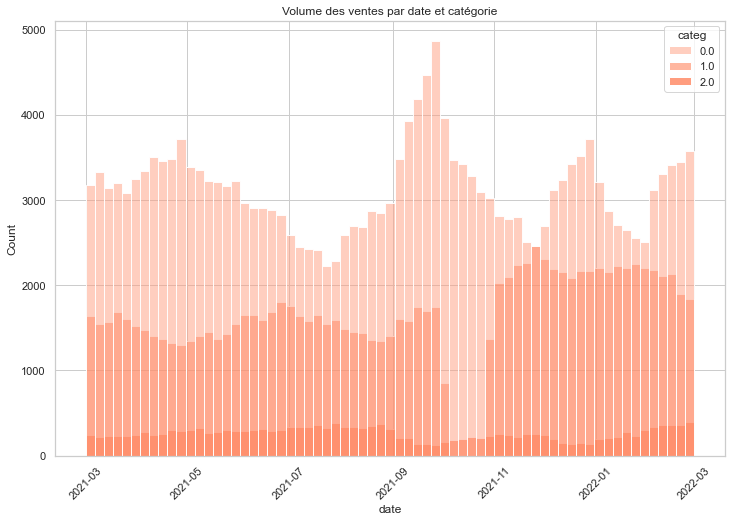

In [75]:
# URL du dossier de destination des graphiques
url_fig = 'graphiques/'

plt.figure(figsize=(12,8))
sns.histplot(data=df, x='date', hue='categ', palette=["#ff9e80", "#ff6e40", "#ff3d00"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie')
plt.savefig(url_fig + 'histogramme_date-categorie.png', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
# pour equilibrer l'analyse on supprime toutes les donees du mois d'octobre

len_df_before = len(df)
# Transaxtions du mois octobre, toutes categories
octobre = df[(df['date']>='2021-10-01') & (df['date']<='2021-10-31')]
df.drop(octobre.index, inplace=True) # Suppression des données du mois d'octobre

# Pourcentage du dataset écarté
print('Mois d\'octobre = ', round(((len_df_before - len(df)) / len_df_before * 100), 1), '% du dataset écarté')


Mois d'octobre =  6.1 % du dataset écarté


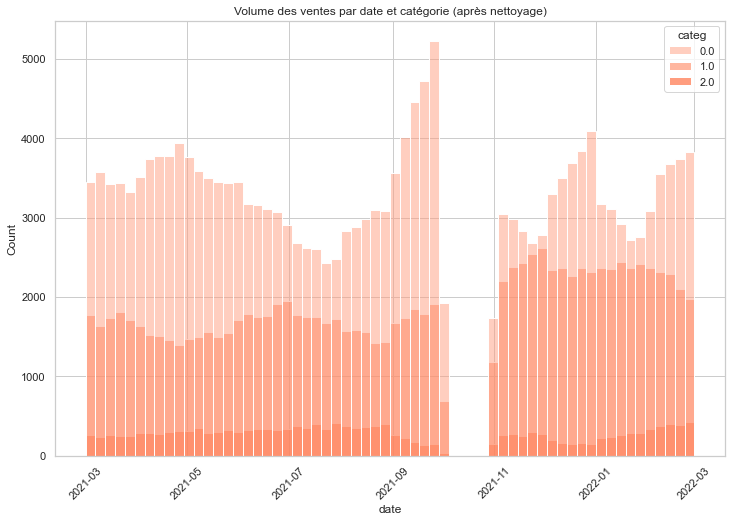

In [77]:
# Volume des ventes par date et catégorie (sans le mois d\'octobre
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='date', hue='categ', palette=["#ff9e80", "#ff6e40", "#ff3d00"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie (après nettoyage)')
plt.savefig(url_fig + 'histogramme_date-categorie_post-nettoyage.png', dpi=300, bbox_inches='tight')
plt.show()

# Valeurs manquantes
Rest a choisir une methode pour traiter les valeurs manquantes 
pour gerer les valeurs manquantes, 3 methodes:
**suprimer les lignes concernees
**determiner une valeur fixe
**modeliser cette valeur

In [78]:
produit_2245 = df[df['id_prod']=='0_2245'] # Échantillon du produit 0_2245
produit_2245

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
6231,6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10797,10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14045,14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17480,17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21071,21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...,...
322523,322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329226,329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330297,330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335331,335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [79]:
# Pourcentage des ventes du produit 0_2245
print('Produit 0_2245 :', round((len(produit_2245) / len(df) * 100), 2), '% du dataset')


Produit 0_2245 : 0.03 % du dataset


In [80]:
df_test = df.dropna() # Échantillon de l'ensemble des commandes, sans le produit 0_2245

# Conversion en string des 2 premiers caractères de la valeur de 'id_prod'
df_test['id_prod'] = df_test['id_prod'].str[:2]

print('Préfixes de \'id_prod\' :') # Pour chaque catégorie, le préfixe unique de 'id_prod'
for i in df_test['categ'].unique():
    print('- catégorie', i, ':',
        df_test[df.dropna()['categ']==i]['id_prod'].unique())


<ipython-input-80-1e08af4ef37c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['id_prod'] = df_test['id_prod'].str[:2]


Préfixes de 'id_prod' :
- catégorie 0.0 : ['0_']
- catégorie 2.0 : ['2_']
- catégorie 1.0 : ['1_']


In [81]:
# Remplacement des valeurs manquantes de la variable 'categ' par 0
df['categ'].replace(np.nan, 0, inplace=True)
produit_2245 = df[df['id_prod']=='0_2245']
produit_2245.sample(3)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
21754,21761,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,0.00
30874,30886,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987,NaN,0.00
35568,35581,0_2245,2021-12-29 23:24:51.621799,s_142078,c_2189,f,1983,NaN,0.00


<ipython-input-82-642bcfb4f04c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  heatmap = sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')


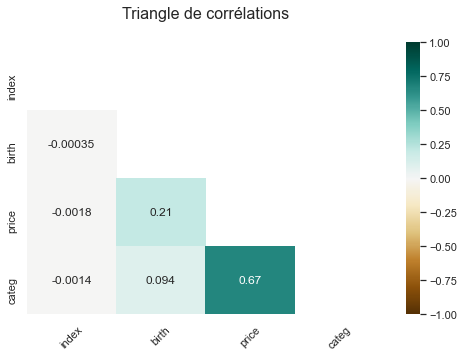

In [82]:
# Triangle de corrélations
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de corrélations', fontdict={'fontsize':16}, pad=24)
plt.xticks(rotation=45)
plt.savefig(url_fig + 'triangle_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

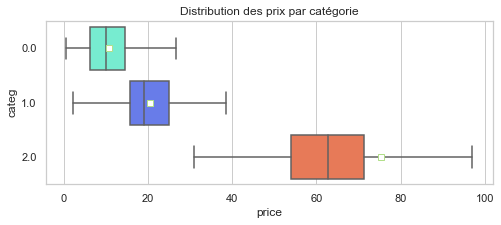

In [83]:
# Distribution et moyenne des prix par catégorie
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#64ffda", "#536dfe", "#ff6e40"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie')
plt.savefig(url_fig + 'boxplots_prix-categorie.png', dpi=300, bbox_inches='tight')
plt.show()

In [84]:
print('Catégorie 0 :',
    '\n- Prix moyen :', round(df[df['categ']==0]['price'].mean(), 2), # Prix moyen
    '\n- Prix médian :', df[df['categ']==0]['price'].median(), # Prix médian
    '\n- Mode :', df[df['categ']==0]['price'].mode().values[0]) # Prix le plus fréquent


Catégorie 0 : 
- Prix moyen : 10.65 
- Prix médian : 9.99 
- Mode : 4.99


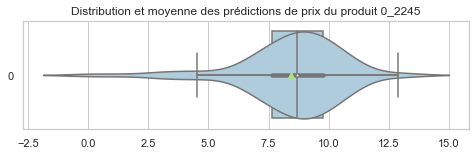

In [85]:
train = df[df['id_prod']!='0_2245'] # Échantillon d'entrainement 
y = train['price'].to_numpy() # Variable cible
features = ['birth', 'categ'] # Variables explicatives
X = pd.get_dummies(train[features]).to_numpy() # Échantillon d'entrainement (variables encodées)
X_test = pd.get_dummies(produit_2245[features]).to_numpy() # Échantillon test
model = sk.linear_model.LinearRegression() # Modèle
model.fit(X, y) # Fit les variables explicatives et la target sur le modèle
predictions = pd.Series(model.predict(X_test)) # Prédiction sur l'échantillon test

plt.figure(figsize=(8, 2))
sns.violinplot(data=predictions, orient='h', showfliers=False, showmeans=True)
sns.boxplot(data=predictions, orient='h', showfliers=False, showmeans=True)
plt.title('Distribution et moyenne des prédictions de prix du produit 0_2245')
plt.savefig(url_fig + 'boxplot_predictions-prix.png', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
print('Prédictions sur la catégorie:',
    '\n- Prix moyen :', round(predictions.mean(), 2),
    '\n- Prix médian :', round(predictions.median(), 2),
    '\n- Mode :', round(predictions.mode(), 2)[0])


Prédictions sur la catégorie: 
- Prix moyen : 8.45 
- Prix médian : 8.7 
- Mode : 8.6


In [87]:
df['price'].replace(np.nan, 9.99, inplace=True)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


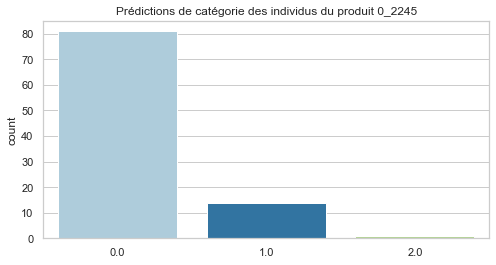

In [88]:
train = df[df['id_prod']!='0_2245']
features = ['sex', 'birth']
y = train['categ']
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(produit_2245[features])
model = sk.ensemble.RandomForestClassifier()
model.fit(X, y)
predictions = model.predict(X_test)

sns.countplot(predictions)
plt.title('Prédictions de catégorie des individus du produit 0_2245')
plt.savefig(url_fig + 'countplot_predictions-categorie.png', dpi=300, bbox_inches='tight')
plt.show()

# Variables Supplementaires
        Pour enrichir l'analyse on cree quelques variables additionnelles comme:
// le mois de la transaction
// le nombre de prosuits achetes par client chaque mois
// le nombre de ventes total par client sur l'annee entier
// le panier moyen
// la taille du panier moyen pour chaque client
// le chiffre d'affaire total par client sur l'annee


In [89]:
# Mois de la transaction
df['mois'] = pd.DatetimeIndex(df['date']).month # Mois, de 1 à 12
df.sample()

df['date_fixe'] = df['date'].dt.date # Variable temporaire de date fixe (jour)

df = df.merge(
    df.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'}),
    how='left', on='client_id')
df.sample(3)

df['ventes_mensuelles'] = round(df['total_ventes'] / 11)
df.sample()

df = df.merge(
    df.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price', 
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'}), 
    on='client_id', how='left')

df = df.merge(
    df.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'panier_moyen'}), 
    on='client_id', how='left').drop('date_fixe', axis=1)


df = df.merge(
    df.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'}),
    on='client_id', how='left')
df.sample(3)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
195786,208652,0_1358,2022-02-18 14:46:14.560507,s_167132,c_7062,m,1980,16.49,0.00,2,40,4.00,2.22,12.96,489.38
190325,202868,0_1923,2021-03-05 02:12:24.877618,s_1884,c_3732,m,1989,3.99,0.00,3,76,7.00,3.04,12.68,933.39
115069,122735,0_1584,2022-01-17 08:43:23.442587,s_151062,c_1609,m,1980,11.85,0.00,1,11861,"1,078.00",35.41,12.72,"151,018.91"
